In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm

  0%|          | 0/16268 [00:00<?, ?it/s]

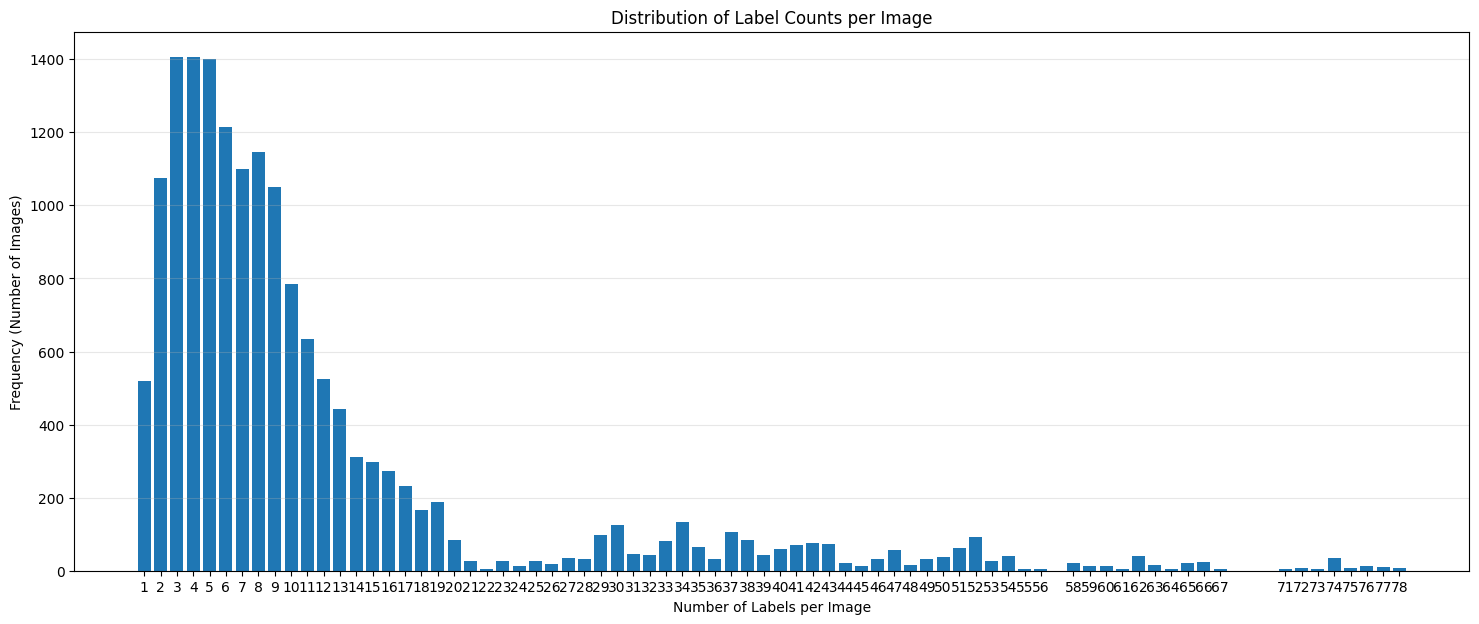

In [10]:
# Path to the labels directory
labels_dir = "dataset/labels/train"  # or "labels_hd"

# Dictionary to store label counts
label_counts = {}

# Iterate through all label files
for filename in tqdm(os.listdir(labels_dir)):
    if filename.endswith(".txt"):
        filepath = os.path.join(labels_dir, filename)
        # Count lines in the file
        with open(filepath, 'r') as f:
            count = len(f.readlines())
        # Update count dictionary
        if count in label_counts:
            label_counts[count] += 1
        else:
            label_counts[count] = 1

# Sort the dictionary by keys
sorted_counts = {k: label_counts[k] for k in sorted(label_counts.keys())}

# Plot the distribution
plt.figure(figsize=(18, 7))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xlabel('Number of Labels per Image')
plt.ylabel('Frequency (Number of Images)')
plt.title('Distribution of Label Counts per Image')
plt.xticks(list(sorted_counts.keys()))
plt.grid(axis='y', alpha=0.3)
plt.show()

In [5]:
pixel_size = 0.31  # meters per pixel
image_size = 416  # pixels

areas = []

for filename in tqdm(os.listdir(labels_dir)):
    if filename.endswith(".txt"):
        filepath = os.path.join(labels_dir, filename)
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:  # category, x_center, y_center, width, height
                    _, _, _, x_width, y_width = parts
                    x_width = float(x_width) * image_size  # denormalize width
                    y_width = float(y_width) * image_size  # denormalize height
                    width_meters = x_width * pixel_size
                    height_meters = y_width * pixel_size
                    area = width_meters * height_meters
                    areas.append(area)

mean_area = np.mean(areas)
std_area = np.std(areas)

print(f"Mean area: {mean_area:.2f} square meters")
print(f"Standard deviation: {std_area:.2f} square meters")

  0%|          | 0/16268 [00:00<?, ?it/s]

Mean area: 191.90 square meters
Standard deviation: 637.21 square meters


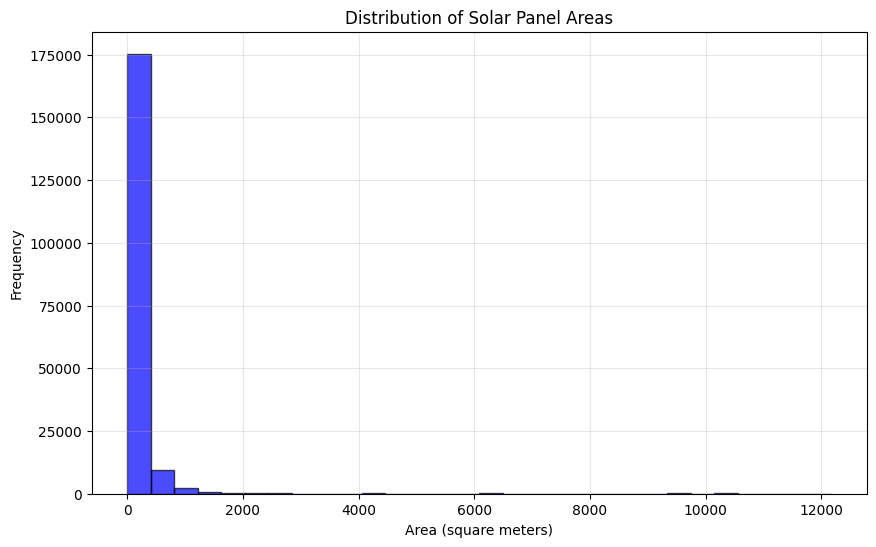

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Area (square meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Panel Areas')
plt.grid(alpha=0.3)
plt.show()